## 멜론 플랫폼을 이용한 시대 별 인기 차트 가사 분석

멜론 차트를 이용한 1990년부터 연도별 인기있던 Top 100 노래의 가사를 추출, 가사 분석을 통해 각 시대별 인기 있던 노래 가사 트렌드를 분석해보자.

In [4]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
from bs4 import BeautifulSoup

In [5]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 웹드라이버를 브라우저 없이 실행하겠다
chrome_options.add_argument('--no-sandbox') # 보안기능 sandbox를 비활성화
chrome_options.add_argument('--disable-dev-shm-usage') # dev~를 사용하지 않겠다 , 공유메모리 담당
driver = webdriver.Chrome('chromedriver',options=chrome_options)

1990년부터 마지막 숫자를 1씩 더해 2021년까지  
https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate=1990  

각 연도마다 TOP 30곡 씩 뽑아 가사를 분석한다.

In [11]:
driver.get("https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate=2021")
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

### 제목

In [12]:
title=driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank01') # 제목

title2=[]
for i in title:
    title2.append(i.text)
    
del title2[30:]    

In [13]:
title2

['Celebrity',
 "롤린 (Rollin')",
 'Dynamite',
 'Next Level',
 '라일락',
 '밤하늘의 별을(2020)',
 '신호등',
 'Butter',
 '내 손을 잡아',
 '밝게 빛나는 별이 되어 비춰줄게',
 '바라만 본다',
 '잠이 오질 않네요',
 '헤픈 우연',
 'Lovesick Girls',
 '취기를 빌려 (취향저격 그녀 X 산들)',
 'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)',
 '운전만해 (We Ride)',
 'Dun Dun Dance',
 'Blueming',
 '에잇(Prod.&Feat. SUGA of BTS)',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '오래된 노래',
 '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야',
 '그날에 나는 맘이 편했을까',
 'Life Goes On',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 'LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)',
 '나랑 같이 걸을래 (바른연애 길잡이 X 적재)',
 '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)',
 'ASAP']

### 가수

In [14]:
singer=driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank02') # 가수

singer2=[]
for i in singer:
    singer2.append(i.text)

del singer2[30:]

In [15]:
singer2

['아이유',
 '브레이브걸스',
 '방탄소년단',
 'aespa',
 '아이유',
 '경서',
 '이무진',
 '방탄소년단',
 '아이유',
 '송이한',
 'MSG워너비(M.O.M)',
 '장범준',
 '헤이즈 (Heize)',
 'BLACKPINK',
 '산들',
 '미란이 (Mirani), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베놈 (MUSHVENOM)',
 '브레이브걸스',
 '오마이걸 (OH MY GIRL)',
 '아이유',
 '아이유',
 'AKMU (악뮤)',
 '스탠딩 에그',
 '장범준',
 '이예준',
 '방탄소년단',
 '폴킴',
 '양요섭, 정은지',
 '적재',
 '방탄소년단',
 'STAYC(스테이씨)']

### 가사

In [16]:
song_info = soup.find_all('div', attrs={'class': 'ellipsis rank01'}) # 곡 정보

In [17]:
# 1992년 11등인 '먼지가되어'와 같이 멜론에서 들을 수 없는 노래는 제외
song_info[10]

<div class="ellipsis rank01"><span>
<strong><a href="javascript:melon.play.playSong('19070207','33625988');" title="바라만 본다">바라만 본다 </a></strong>
</span></div>

In [18]:
# Top 30만 추출
songid = []

for i in range(30):
    try: # 정규 표현식을 활용해 해당 부분에서 숫자인 부분만 뽑아냄
        songid.append(re.sub(r'[^0-9]', '', song_info[i].find("a")["href"][43:])) # 곡 id정보 추출
    except:
        songid.append('')
        continue

In [19]:
len(songid)

30

In [20]:
np.array(songid).reshape(1,-1)

array([['33239419', '30287019', '32872978', '33487342', '33372781',
        '33061995', '33480898', '33507137', '3414749', '33167063',
        '33625988', '33013877', '33503722', '32961718', '32794652',
        '33077590', '32860397', '33464805', '32183386', '32578498',
        '32061975', '3894276', '32003395', '33107649', '33077234',
        '30962526', '33331004', '33011180', '31737197', '33397561']],
      dtype='<U8')

In [21]:
# 얻어낸 곡 id 정보를 활용해 곡 정보 홈페이지에 들어가 가사 추출
lyrics=[]

for i in songid:
    try:
        driver.get("https://www.melon.com/song/detail.htm?songId=" + i)
        lyric=driver.find_element(by=By.CLASS_NAME, value="lyric")
        lyrics.append(lyric.text)
    except: # 가사가 없다.
        lyrics.append('')
        continue

In [22]:
lyrics2 = []

for i in lyrics:
    lyrics2.append(i.replace("\n"," "))

In [23]:
lyrics2

['세상의 모서리 구부정하게 커버린 골칫거리 outsider  걸음걸이, 옷차림, 이어폰 너머 play list 음악까지 다 minor  넌 모르지 떨군 고개 위 환한 빛 조명이 어딜 비추는지  느려도 좋으니 결국 알게 되길 The one and only You are my celebrity  잊지마 넌 흐린 어둠 사이 왼손으로 그린 별 하나 보이니 그 유일함이 얼마나 아름다운지 말야 You are my celebrity  celebrity You are my celebrity  지쳐버린 표정 마치 전원을 꺼놓은 듯이 심장소린 too quiet  네가 가진 반짝거림, 상상력, identity 까지 모조리 diet  넌 모르지 아직 못다 핀 널 위해 쓰여진 오래된 사랑시  헤매도 좋으니 웃음 짓게 되길 The one and only You are my celebrity  잊지마 넌 흐린 어둠 사이 왼손으로 그린 별 하나 보이니 그 유일함이 얼마나 아름다운지 말야 You are my celebrity  발자국마다 이어진 별자리 그 서투른 걸음이 새겨놓은 밑그림 오롯이 너를 만나러 가는 길 그리로 가면 돼 점선을 따라  잊지마 이 오랜 겨울 사이 언 틈으로 피울 꽃 하나 보이니 하루 뒤 봄이 얼마나 아름다울지 말야 You are my celebrity  celebrity You are my celebrity',
 "그 날을 잊지 못해 babe 날 보며 환히 웃던 너의 미소에 홀린 듯 I'm fall in love But 너무 쪽팔림에 난 그저 한마디 말도 못해 babe I wanna you 너의 눈빛은 날 자꾸 네 곁을 맴돌게 해 Just only you 굳게 닫힌 내 맘이 어느새 무너져버려 Because of you 온통 너의 생각뿐이야 나도 미치겠어 너무 보고 싶어 매일 매일 매일 자꾸 초라해지잖아 내 모습이 그대여 내게 말해줘 사랑한다고 Rollin' Rollin' Rollin' Rollin' Rollin' Rollin' Rollin' Rollin' Rolli

In [24]:
df=pd.DataFrame({"제목":title2,"가수":singer2,"가사":lyrics2})

In [25]:
df

,제목,가수,가사
0,Celebrity,아이유,"세상의 모서리 구부정하게 커버린 골칫거리 outsider 걸음걸이, 옷차림, 이어..."
1,롤린 (Rollin'),브레이브걸스,그 날을 잊지 못해 babe 날 보며 환히 웃던 너의 미소에 홀린 듯 I'm fal...
2,Dynamite,방탄소년단,Cos ah ah I’m in the stars tonight So watch me...
3,Next Level,aespa,I’m on the Next Level Yeah 절대적 룰을 지켜 내 손을 놓지 말...
4,라일락,아이유,나리는 꽃가루에 눈이 따끔해 (아야) 눈물이 고여도 꾹 참을래 내 마음 한켠 비밀스...
5,밤하늘의 별을(2020),경서,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니면...
6,신호등,이무진,이제야 목적지를 정했지만 가려한 날 막아서네 난 갈 길이 먼데 새빨간 얼굴로 화를 ...
7,Butter,방탄소년단,Smooth like butter Like a criminal undercover ...
8,내 손을 잡아,아이유,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 ...
9,밝게 빛나는 별이 되어 비춰줄게,송이한,우리의 모든 순간이 애틋해 눈물 날 때면 언제나 네게 닿을 수 있게 가까이서 머물게...


---

하나의 함수로 만들기

In [1]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
from bs4 import BeautifulSoup

driver.get("https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate=2021")
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
def melon_collector(url):
    time.sleep(5)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 제목 가져오기
    title=driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank01') # 제목

    title2=[]
    for i in title:
        title2.append(i.text)

    del title2[30:]    
    
    # 가수 가져오기
    singer=driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank02') # 가수

    singer2=[]
    for i in singer:
        singer2.append(i.text)

    del singer2[30:]
    
    # 가사 가져오기
    
    song_info = soup.find_all('div', attrs={'class': 'ellipsis rank01'})
    
    # Top 30만 추출
    songid = []

    for i in range(30):
        try:
            songid.append(re.sub(r'[^0-9]', '', song_info[i].find("a")["href"][43:])) # 곡 id정보 추출
        except:
            songid.append('')
            continue # 1992년 먼지가 되어와 같이 멜론에서 현재 들을 수 없는 노래 제외
        
    lyrics=[]

    for i in songid:
        try:
            driver.get("https://www.melon.com/song/detail.htm?songId=" + i)
            time.sleep(2)
            lyric=driver.find_element(by=By.CLASS_NAME, value="lyric")
            lyrics.append(lyric.text)  
        except: # 가사가 없다.
            lyrics.append('')
            continue
    lyrics2 = []

    for i in lyrics:
        lyrics2.append(i.replace("\n"," "))
        
    df=pd.DataFrame({"제목":title2,"가수":singer2,"가사":lyrics2})
    
    # 저장하기
    df.to_csv(f'멜론{start}.csv', index = False)

1990년부터 2021년까지 melon top 30 데이터를 csv로 저장한다. 이 때 현재 멜론에서 들을 수 없는 노래, 가사가 등록되어있지 않은 노래들은 제외한다.

In [7]:
start = 1990
url = 'https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate='

while start<=2021:
    new_url = url + str(start)
    melon_collector(new_url)
    print(start,'완료')
    start += 1

1990 완료
1991 완료
1992 완료
1993 완료
1994 완료
1995 완료
1996 완료
1997 완료
1998 완료
1999 완료
2000 완료
2001 완료
2002 완료
2003 완료
2004 완료
2005 완료
2006 완료
2007 완료
2008 완료
2009 완료
2010 완료
2011 완료
2012 완료
2013 완료
2014 완료
2015 완료
2016 완료
2017 완료
2018 완료
2019 완료
2020 완료
2021 완료


-----

### 크롤링해서 만든 csv로 텍스트 분석

In [1]:
import numpy as np

In [2]:
import pandas as pd

melon_1990s = pd.concat([pd.read_csv('멜론1990.csv'), pd.read_csv('멜론1991.csv'), pd.read_csv('멜론1992.csv'), pd.read_csv('멜론1993.csv'),
          pd.read_csv('멜론1994.csv'), pd.read_csv('멜론1995.csv'), pd.read_csv('멜론1996.csv'), pd.read_csv('멜론1997.csv'),
          pd.read_csv('멜론1998.csv'), pd.read_csv('멜론1999.csv')])

melon_2000s = pd.concat([pd.read_csv('멜론2000.csv'), pd.read_csv('멜론2001.csv'), pd.read_csv('멜론2002.csv'), pd.read_csv('멜론2003.csv'),
          pd.read_csv('멜론2004.csv'), pd.read_csv('멜론2005.csv'), pd.read_csv('멜론2006.csv'), pd.read_csv('멜론2007.csv'),
          pd.read_csv('멜론2008.csv'), pd.read_csv('멜론2009.csv')])

melon_2010s = pd.concat([pd.read_csv('멜론2010.csv'), pd.read_csv('멜론2011.csv'), pd.read_csv('멜론2012.csv'), pd.read_csv('멜론2013.csv'),
          pd.read_csv('멜론2014.csv'), pd.read_csv('멜론2015.csv'), pd.read_csv('멜론2016.csv'), pd.read_csv('멜론2017.csv'),
          pd.read_csv('멜론2018.csv'), pd.read_csv('멜론2019.csv')])

melon_2020s = pd.concat([pd.read_csv('멜론2020.csv'), pd.read_csv('멜론2021.csv')])


In [3]:
# 가사가 없는 데이터의 개수 
pd.concat([melon_1990s,melon_2000s, melon_2010s, melon_2020s]).가사.isnull().sum()

12

In [4]:
# index 재지정
melon_1990s.reset_index(drop=True, inplace = True)
melon_2000s.reset_index(drop=True, inplace = True)
melon_2010s.reset_index(drop=True, inplace = True)
melon_2020s.reset_index(drop=True, inplace = True)

In [5]:
# 가사 column을 따로 지정
gasa_1990s = melon_1990s.가사
gasa_2000s = melon_2000s.가사
gasa_2010s = melon_2010s.가사
gasa_2020s = melon_2020s.가사

**토큰화** : 가사 중 명사만 추출

In [6]:
from konlpy.tag import Okt, Komoran

Okt = Okt() 
Komoran = Komoran() # 오탈자 인식에 강함

In [7]:
# Okt
noun_1990s = []
noun_2000s = []
noun_2010s = []
noun_2020s = []

for i in gasa_1990s:
    try:
        noun_1990s.append(Okt.nouns(i))
    except:
        continue

for i in gasa_2000s:
    try:
        noun_2000s.append(Okt.nouns(i))
    except:
        continue
        
for i in gasa_2010s:
    try:
        noun_2010s.append(Okt.nouns(i))
    except:
        continue
        
for i in gasa_2020s:
    try:
        noun_2020s.append(Okt.nouns(i))
    except:
        continue

In [8]:
# Komoran
noun2_1990s = []
noun2_2000s = []
noun2_2010s = []
noun2_2020s = []

for i in gasa_1990s:
    try:
        noun2_1990s.append(Komoran.nouns(i))
    except:
        continue

for i in gasa_2000s:
    try:
        noun2_2000s.append(Komoran.nouns(i))
    except:
        continue
        
for i in gasa_2010s:
    try:
        noun2_2010s.append(Komoran.nouns(i))
    except:
        continue
        
for i in gasa_2020s:
    try:
        noun2_2020s.append(Komoran.nouns(i))
    except:
        continue

**불용어처리**

stopword는 주로 쓰이는 한국어 불용어 리스트를 사용했다.  
https://www.ranks.nl/stopwords/korean  

또한 분석을 하다가 중요하지 않은 불용어 들을 넣어주었다.

In [64]:
# 한국어 불용어
with open('stopword.txt', 'r', encoding='utf-8') as f:
    text = f.read()

stopwords = text.split()    

In [65]:
np.array(stopwords).reshape(1,-1)

array([['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해',
        '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여',
        '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면', '저', '소인', '소생',
        '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다',
        '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고',
        '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에', '논하지', '않다',
        '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이',
        '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다',
        '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도',
        '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다',
        '이리하여', '그리하여', '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서',
        '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다',
        '할수있어', '임에', '틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만',
        '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼',

In [66]:
# 불용어 처리
noun_1990s_sw = []; noun_2000s_sw = []; noun_2010s_sw = []; noun_2020s_sw = []
noun2_1990s_sw = []; noun2_2000s_sw = []; noun2_2010s_sw=[]; noun2_2020s_sw =[]

# 2차원 형태이므로
for text in noun_1990s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun_1990s_sw.append(temp)
    
for text in noun_2000s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun_2000s_sw.append(temp)
    
for text in noun_2010s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun_2010s_sw.append(temp)
    
for text in noun_2020s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun_2020s_sw.append(temp)

# 2    
for text in noun2_1990s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun2_1990s_sw.append(temp)
    
for text in noun2_2000s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun2_2000s_sw.append(temp)
    
for text in noun2_2010s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun2_2010s_sw.append(temp)
    
for text in noun2_2020s: 
    temp = []
    for word in text:
        if word not in stopwords:
            temp.append(word)
    noun2_2020s_sw.append(temp)    

In [67]:
# 불용어 처리로 적어진 모습
count = 0
for i in noun_1990s:
    for j in i:
        count +=1
count

23586

In [68]:
count = 0
for i in noun_1990s_sw:
    for j in i:
        count +=1
count

13855

빈도 분석

In [69]:
from collections import Counter

word_counts_1990s = Counter()
word_counts_2000s = Counter()
word_counts_2010s = Counter()
word_counts_2020s = Counter()

In [70]:
word_counts2_1990s = Counter()
word_counts2_2000s = Counter()
word_counts2_2010s = Counter()
word_counts2_2020s = Counter()

In [71]:
# Top 30 노래 가사에서 등장한 단어의 빈도
# Okt
for document in noun_1990s_sw:
    word_counts_1990s.update(document)
for document in noun_2000s_sw:
    word_counts_2000s.update(document)
for document in noun_2010s_sw:
    word_counts_2010s.update(document)
for document in noun_2020s_sw:
    word_counts_2020s.update(document)

In [72]:
# Komoran
for document in noun2_1990s_sw:
    word_counts2_1990s.update(document)
for document in noun2_2000s_sw:
    word_counts2_2000s.update(document)
for document in noun2_2010s_sw:
    word_counts2_2010s.update(document)
for document in noun2_2020s_sw:
    word_counts2_2020s.update(document)

두 형태소 분석기의 빈도 분석 결과의 차이점을 확인할 수 있다.

In [73]:
Okt_freq = pd.DataFrame([word_counts_1990s.most_common(10), word_counts_2000s.most_common(10), 
              word_counts_2010s.most_common(10), word_counts_2020s.most_common(10)])
Okt_freq.set_index(keys = [[1990,2000,2010,2020]], inplace = True)
Okt_freq.columns = np.arange(1,11)
Okt_freq

,1,2,3,4,5,6,7,8,9,10
1990,"(사랑, 809)","(그대, 431)","(말, 339)","(마음, 258)","(모습, 244)","(사람, 215)","(세상, 193)","(생각, 187)","(이제, 176)","(눈물, 165)"
2000,"(사랑, 1233)","(말, 594)","(그대, 498)","(사람, 319)","(맘, 270)","(눈물, 254)","(가슴, 200)","(세상, 179)","(이제, 178)","(눈, 170)"
2010,"(사랑, 681)","(말, 593)","(그대, 284)","(맘, 248)","(눈, 207)","(밤, 204)","(사람, 193)","(지금, 169)","(눈물, 167)","(오늘, 166)"
2020,"(말, 124)","(사랑, 80)","(맘, 43)","(지금, 36)","(밤, 34)","(모든, 34)","(그대, 32)","(노래, 31)","(눈, 31)","(매일, 31)"


In [74]:
Komoran_freq = pd.DataFrame([word_counts2_1990s.most_common(10), word_counts2_2000s.most_common(10), 
              word_counts2_2010s.most_common(10), word_counts2_2020s.most_common(10)])
Komoran_freq.set_index(keys = [[1990,2000,2010,2020]], inplace = True)
Komoran_freq.columns = np.arange(1,11)
Komoran_freq

,1,2,3,4,5,6,7,8,9,10
1990,"(사랑, 574)","(말, 311)","(마음, 268)","(이제, 258)","(모습, 244)","(사람, 218)","(생각, 193)","(세상, 184)","(눈물, 164)","(꿈, 139)"
2000,"(사랑, 846)","(말, 526)","(사람, 321)","(맘, 279)","(눈물, 260)","(이제, 224)","(가슴, 199)","(세상, 178)","(눈, 166)","(행복, 159)"
2010,"(말, 585)","(사랑, 499)","(맘, 254)","(눈, 225)","(사람, 197)","(밤, 196)","(생각, 166)","(눈물, 165)","(오늘, 164)","(마음, 145)"
2020,"(말, 109)","(사랑, 64)","(맘, 43)","(노래, 35)","(눈, 35)","(밤, 33)","(생각, 29)","(꿈, 29)","(마음, 26)","(순간, 25)"


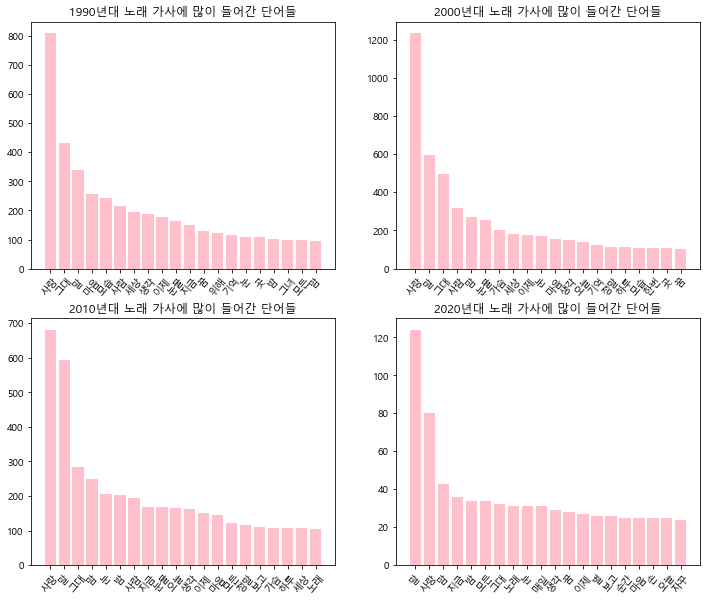

In [86]:
# 자주 등장한 단어 시각화  by Okt
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12,10))

plt.subplot(221)
a = []
b = []
for word, count in word_counts_1990s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
plt.bar(a, b, color = 'pink')
plt.xticks(rotation = 55)
plt.title('1990년대 노래 가사에 많이 들어간 단어들')

plt.subplot(222)
a = []
b = []
for word, count in word_counts_2000s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'pink')
plt.xticks(rotation = 55)
plt.title('2000년대 노래 가사에 많이 들어간 단어들')

plt.subplot(223)
a = []
b = []
for word, count in word_counts_2010s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'pink')
plt.xticks(rotation = 55)
plt.title('2010년대 노래 가사에 많이 들어간 단어들')

plt.subplot(224)
a = []
b = []
for word, count in word_counts_2020s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'pink')
plt.xticks(rotation = 55)
plt.title('2020년대 노래 가사에 많이 들어간 단어들')
plt.show()

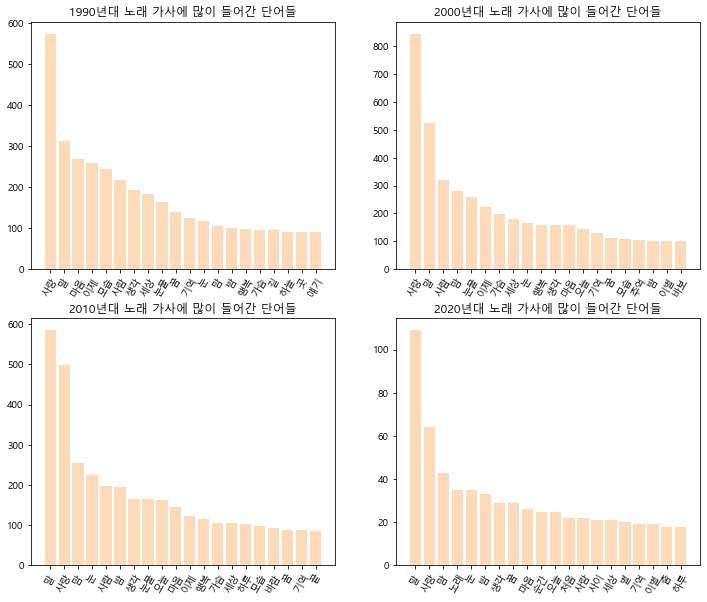

In [76]:
# 자주 등장한 단어 시각화  by Komoran
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12,10))

plt.subplot(221)
a = []
b = []
for word, count in word_counts2_1990s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('1990년대 노래 가사에 많이 들어간 단어들')

plt.subplot(222)
a = []
b = []
for word, count in word_counts2_2000s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2000년대 노래 가사에 많이 들어간 단어들')

plt.subplot(223)
a = []
b = []
for word, count in word_counts2_2010s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2010년대 노래 가사에 많이 들어간 단어들')

plt.subplot(224)
a = []
b = []
for word, count in word_counts2_2020s.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2020년대 노래 가사에 많이 들어간 단어들')
plt.show()

모든 년대에서 자주 등장한 단어를 제외하고 다시 분석해보자

In [87]:
stopwords2 = ['사랑', '말', '맘', '사람', '마음']

In [88]:
# 많이 나온 단어들을 재 불용어처리
noun2_1990s_sw2 = []; noun2_2000s_sw2 = []; noun2_2010s_sw2=[]; noun2_2020s_sw2 =[]

for text in noun2_1990s_sw: 
    temp = []
    for word in text:
        if word not in stopwords2:
            temp.append(word)
    noun2_1990s_sw2.append(temp)
    
for text in noun2_2000s_sw: 
    temp = []
    for word in text:
        if word not in stopwords2:
            temp.append(word)
    noun2_2000s_sw2.append(temp)
    
for text in noun2_2010s_sw: 
    temp = []
    for word in text:
        if word not in stopwords2:
            temp.append(word)
    noun2_2010s_sw2.append(temp)
    
for text in noun2_2020s_sw: 
    temp = []
    for word in text:
        if word not in stopwords2:
            temp.append(word)
    noun2_2020s_sw2.append(temp)   

In [89]:
word_counts2_1990s2 = Counter()
word_counts2_2000s2 = Counter()
word_counts2_2010s2 = Counter()
word_counts2_2020s2 = Counter()

In [90]:
# Komoran
for document in noun2_1990s_sw2:
    word_counts2_1990s2.update(document)
for document in noun2_2000s_sw2:
    word_counts2_2000s2.update(document)
for document in noun2_2010s_sw2:
    word_counts2_2010s2.update(document)
for document in noun2_2020s_sw2:
    word_counts2_2020s2.update(document)

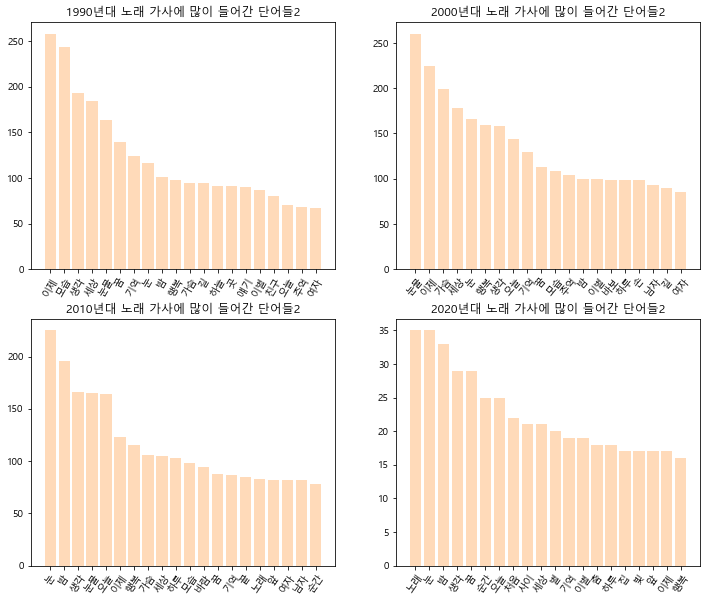

In [95]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12,10))

plt.subplot(221)
a = []
b = []
for word, count in word_counts2_1990s2.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('1990년대 노래 가사에 많이 들어간 단어들2')

plt.subplot(222)
a = []
b = []
for word, count in word_counts2_2000s2.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2000년대 노래 가사에 많이 들어간 단어들2')

plt.subplot(223)
a = []
b = []
for word, count in word_counts2_2010s2.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2010년대 노래 가사에 많이 들어간 단어들2')

plt.subplot(224)
a = []
b = []
for word, count in word_counts2_2020s2.most_common(20):  # most_common(20) 20개 추출
    a.append(word)
    b.append(count)
    
plt.bar(a, b, color = 'peachpuff')
plt.xticks(rotation = 55)
plt.title('2020년대 노래 가사에 많이 들어간 단어들2')
plt.show()

---

nltk 분석을 위해 단어들을 한 리스트에 저장

In [97]:
# 단어들을 한 리스트에 저장 - Komoran
words2_1990s = []
words2_2000s = []
words2_2010s = []
words2_2020s = []

for i in noun2_1990s_sw2:
    for j in i:
        words2_1990s.append(j)
        
for i in noun2_2000s_sw2:
    for j in i:
        words2_2000s.append(j)
        
for i in noun2_2010s_sw2:
    for j in i:
        words2_2010s.append(j)
        
for i in noun2_2020s_sw2:
    for j in i:
        words2_2020s.append(j)   

In [98]:
# Okt의 단어 개수, Komoran의 단어 개수
print(len(words2_1990s))
print(len(words2_2000s))
print(len(words2_2010s))
print(len(words2_2020s))

9746
11604
13391
2525


앞으로는 Komoran 분석기를 활용한 리스트만 분석에 활용!!

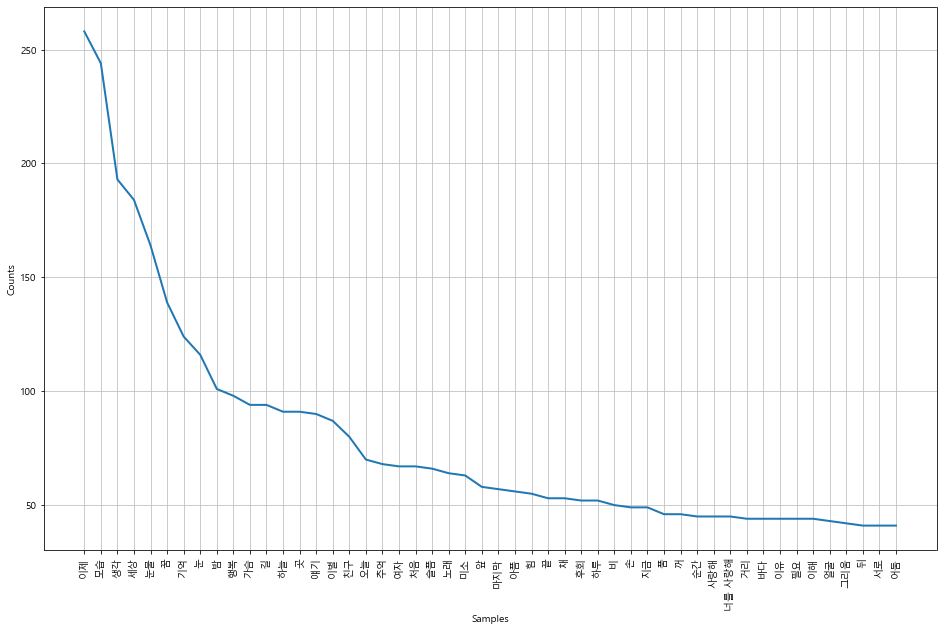

In [99]:
import nltk

# 각 단어(토큰)의 사용 빈도
plt.figure(figsize=(16,10))
texts_1990s = nltk.Text(words2_1990s, name='단어 빈도수')
texts_1990s.plot(50) # 50개만

plt.show()

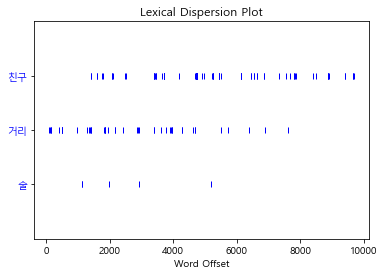

In [101]:
# 단어가 사용된 위치를 시각화
texts_1990s.dispersion_plot(['친구', '거리', '술'])

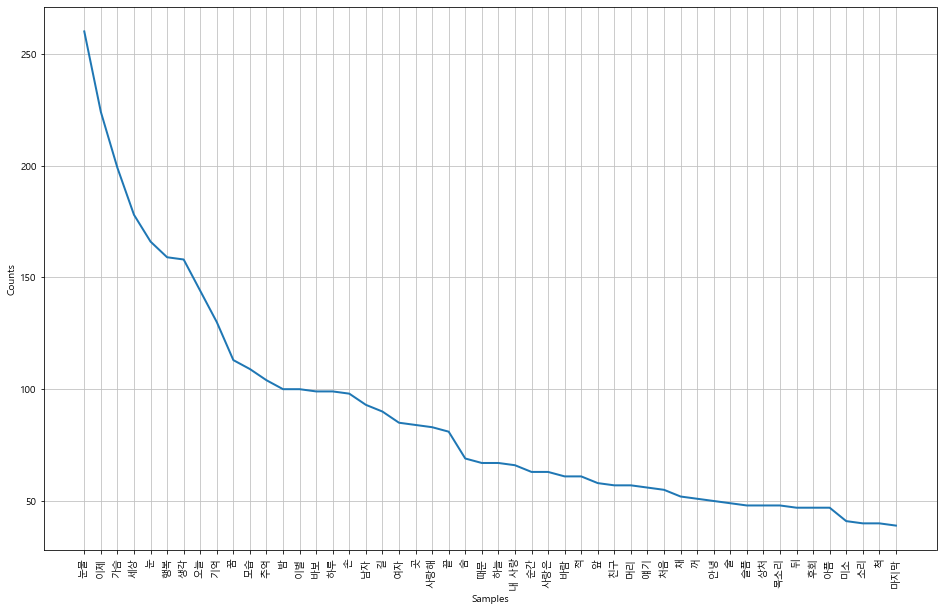

In [103]:
import nltk

plt.figure(figsize=(16,10))
texts_2000s = nltk.Text(words2_2000s, name='단어 빈도수')
texts_2000s.plot(50)

plt.show()

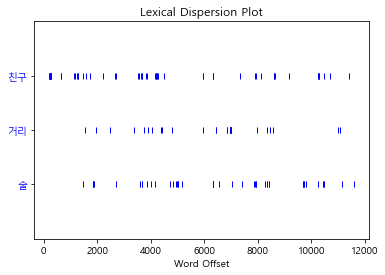

In [105]:
texts_2000s.dispersion_plot(['친구', '거리', '술'])

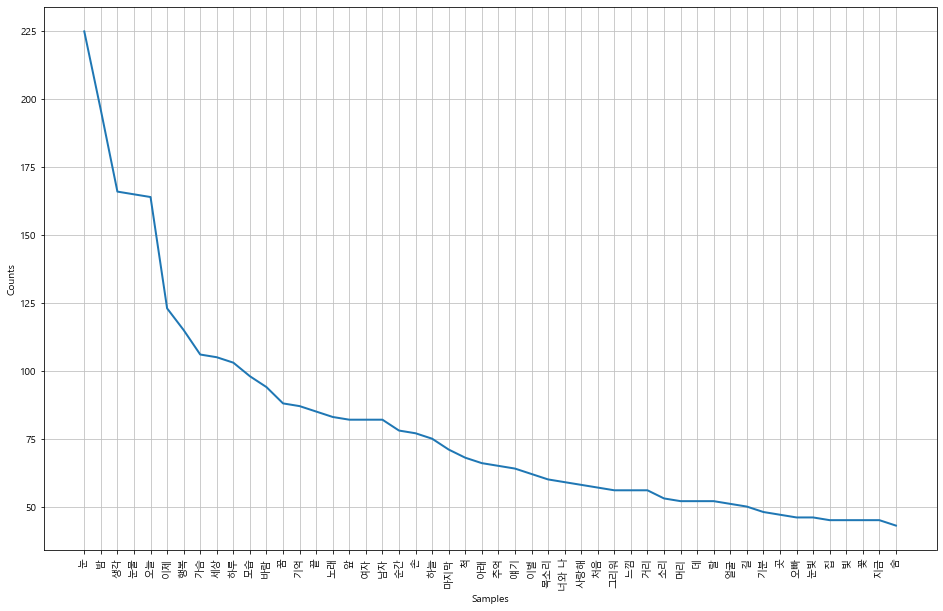

In [106]:
import nltk

plt.figure(figsize=(16,10))
texts_2010s = nltk.Text(words2_2010s, name='단어 빈도수')
texts_2010s.plot(50) # 50개만

plt.show()

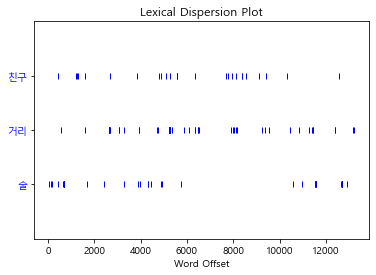

In [107]:
texts_2010s.dispersion_plot(['친구', '거리', '술'])

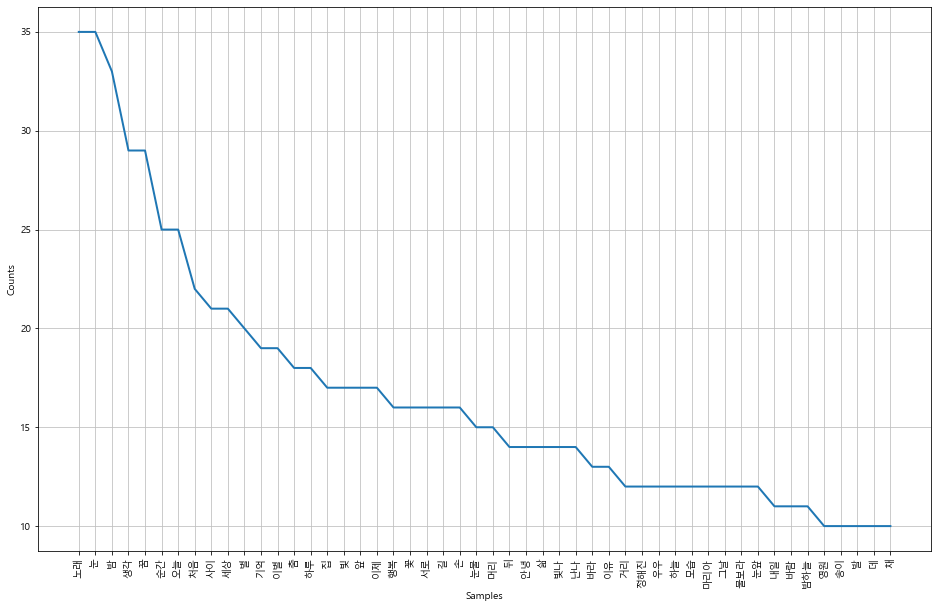

In [108]:
import nltk

plt.figure(figsize=(16,10))
texts_2020s = nltk.Text(words2_2020s, name='단어 빈도수')
texts_2020s.plot(50) # 50개만

plt.show()

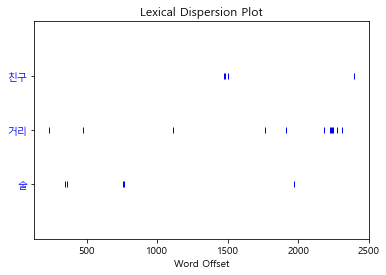

In [109]:
texts_2020s.dispersion_plot(['친구', '거리', '술'])

In [110]:
# nltk로도 빈도를 확인할 수 있다.
texts_1990s.vocab(), texts_2000s.vocab(), texts_2010s.vocab(), texts_2020s.vocab()

(FreqDist({'이제': 258, '모습': 244, '생각': 193, '세상': 184, '눈물': 164, '꿈': 139, '기억': 124, '눈': 116, '밤': 101, '행복': 98, ...}),
 FreqDist({'눈물': 260, '이제': 224, '가슴': 199, '세상': 178, '눈': 166, '행복': 159, '생각': 158, '오늘': 144, '기억': 130, '꿈': 113, ...}),
 FreqDist({'눈': 225, '밤': 196, '생각': 166, '눈물': 165, '오늘': 164, '이제': 123, '행복': 115, '가슴': 106, '세상': 105, '하루': 103, ...}),
 FreqDist({'노래': 35, '눈': 35, '밤': 33, '생각': 29, '꿈': 29, '순간': 25, '오늘': 25, '처음': 22, '사이': 21, '세상': 21, ...}))

1990년대부터 지금까지 사랑, 말 이라는 단어가 많이 쓰인것을 확인할 수 있다. 

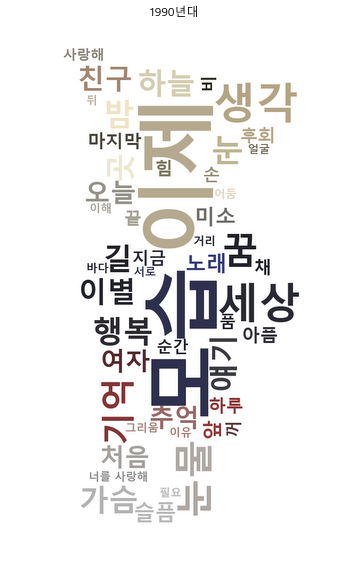

In [112]:
#워드클라우드로 나타내기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

  
img_mask = np.array(Image.open("yungyung.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(stopwords)    
FONTPATH =  "malgunbd.ttf"

wordcloud = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(word_counts2_1990s2)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.title('1990년대')
# plt.savefig("word_counts_1990s.png")
plt.show()

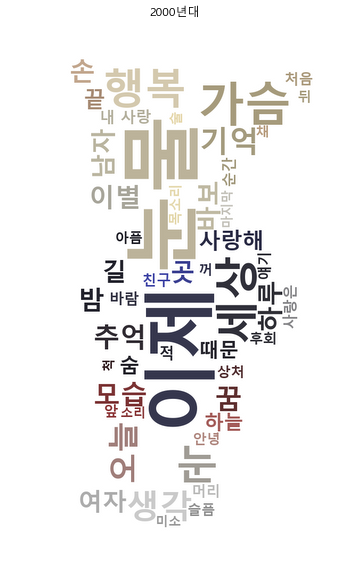

In [113]:
img_mask = np.array(Image.open("yungyung.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(stopwords)    
FONTPATH =  "malgunbd.ttf"

wordcloud = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(word_counts2_2000s2)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.title('2000년대')
# plt.savefig("word_counts_1990s.png")
plt.show()

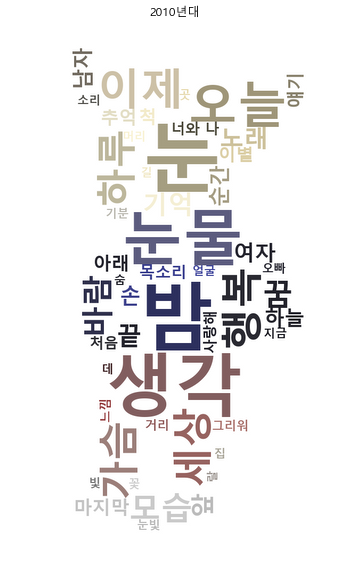

In [114]:
img_mask = np.array(Image.open("yungyung.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(stopwords)    
FONTPATH =  "malgunbd.ttf"

wordcloud = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(word_counts2_2010s2)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.title('2010년대')
# plt.savefig("word_counts_1990s.png")
plt.show()

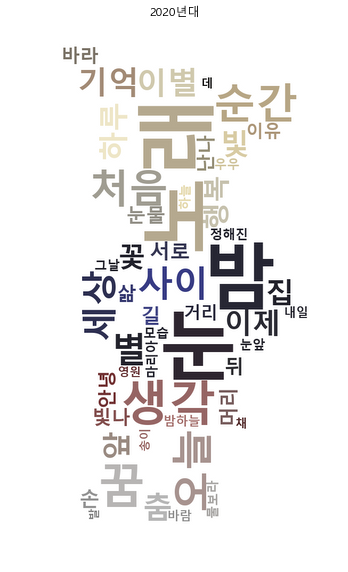

In [115]:
img_mask = np.array(Image.open("yungyung.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(stopwords)    
FONTPATH =  "malgunbd.ttf"

wordcloud = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(word_counts2_2020s2)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.title('2020년대')
# plt.savefig("word_counts_1990s.png")
plt.show()

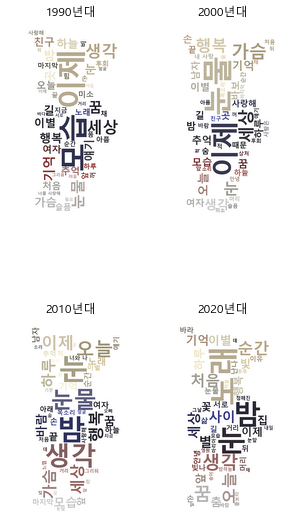

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

plt.figure(figsize = (5, 10))


img_mask = np.array(Image.open("yungyung.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(stopwords)    
FONTPATH =  "malgunbd.ttf"

wordcloud1 = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wordcloud2 = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wordcloud3 = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wordcloud4 = WordCloud(max_font_size = 150, max_words = 50, background_color='white', stopwords=stopwords, 
                      random_state= 2020,mask=img_mask, color_func=image_colors, font_path = FONTPATH)

wc1 = wordcloud1.generate_from_frequencies(word_counts2_1990s2)
wc2 = wordcloud2.generate_from_frequencies(word_counts2_2000s2)
wc3 = wordcloud3.generate_from_frequencies(word_counts2_2010s2)
wc4 = wordcloud4.generate_from_frequencies(word_counts2_2020s2)

plt.subplot(221)
plt.imshow(wc1, interpolation = "lanczos")
plt.axis("off")
plt.title('1990년대')

plt.subplot(222)
plt.imshow(wc2, interpolation = "lanczos")
plt.axis("off")
plt.title('2000년대')

plt.subplot(223)
plt.imshow(wc3, interpolation = "lanczos")
plt.axis("off")
plt.title('2010년대')

plt.subplot(224)
plt.imshow(wc4, interpolation = "lanczos")
plt.axis("off")
plt.title('2020년대')

plt.show()

tf-idf 분석 

중간에 결측치가 존재하는 값이 있기 때문에 연도별 노래마다 한 리스트에 저장되어 있는 gasa_XXXXs 데이터 사용하지 않고 이를 분리한 noun_1990s 값을 join한 데이터를 사용한다.

In [126]:
gasa_1990s

0      청바지가 잘 어울리는 여자 밥을 많이 먹어도 배 안나오는 여자 내 얘기가 재미 없어...
1      나를 어떻게 생각하냐고 너는 내게 묻지만 대답하기는 힘들어 너에게 이런 얘길 한다면...
2      낮부터 내린 비는 이 저녁 유리창에 이슬만 뿌려놓고서 밤이 되면 더욱 커지는 시계소...
3      빗방울 떨어지는 그 거리에 서서 그대 숨소리 살아있는 듯 느껴지면 깨끗한 붓 하나를...
4      지금 슬픈 내 모습은 무대뒤 한 소녀 애써 눈물 참으며 바라보고 있네 무대 뒤에 그...
                             ...                        
295    너를 사랑해 나의 마음이 Oh 너를 생각할 수록 나는 행복해 다른 누구도 난 부럽지...
296    기억 나지 않아 어젯밤 꿈조차 지우려고 했던게 아닌데 잠들지 않도록 널 부르며 눈 ...
297    꼭 편지 할게요 내일 또 만나지만 돌아온 길엔 언제나 아쉽기만 해 더 정성스럽게 당...
298    햇살처럼 눈부시게 다가와 나를 깨우던 그대는 봄비처럼 내게 스쳐지나가 나의 첫사랑 ...
299    첨엔 혼자라는게 편했지 자유로운 선택과 시간에 너의 기억을 지운 듯 했어 정말 난 ...
Name: 가사, Length: 300, dtype: object

In [149]:
gasa_1990s.isnull().sum()

7

In [128]:
tf_noun_1990s = []
tf_noun_2000s = []
tf_noun_2010s = []
tf_noun_2020s = []

for i in noun_1990s:
    tf_noun_1990s.append(" ".join(i))
for i in noun_2000s:
    tf_noun_2000s.append(" ".join(i))
for i in noun_2010s:
    tf_noun_2010s.append(" ".join(i))
for i in noun_2020s:
    tf_noun_2020s.append(" ".join(i))    

In [129]:
len(tf_noun_1990s)

293

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_1990s = TfidfVectorizer()  # 1글자 사용x, L2 정규화
vectorizer_2000s = TfidfVectorizer()
vectorizer_2010s = TfidfVectorizer()
vectorizer_2020s = TfidfVectorizer()

doc_term_mat_1990s = vectorizer_1990s.fit_transform(tf_noun_1990s)
doc_term_mat_d_1990s = doc_term_mat_1990s.toarray() # 희소행렬

doc_term_mat_2000s = vectorizer_2000s.fit_transform(tf_noun_2000s)
doc_term_mat_d_2000s = doc_term_mat_2000s.toarray() 

doc_term_mat_2010s = vectorizer_2010s.fit_transform(tf_noun_2010s)
doc_term_mat_d_2010s = doc_term_mat_2010s.toarray() 

doc_term_mat_2020s = vectorizer_2020s.fit_transform(tf_noun_2020s)
doc_term_mat_d_2020s = doc_term_mat_2020s.toarray() 

In [140]:
print(vectorizer_1990s.get_feature_names_out()) # 피처명
print(vectorizer_2000s.get_feature_names_out())
print(vectorizer_2010s.get_feature_names_out())
# print(vectorizer_2020s.get_feature_names_out())

['가게' '가까스로' '가까이' ... '흰눈' '히죽' '힙겹다']
['가게' '가기' '가까이' ... '희망이' '힘껏' '힙합']
['가게' '가기' '가까스로' ... '희망' '힘껏' '힙합']


In [142]:
# 희소 행렬 dataframe 만들기
tfidf_1990s = pd.DataFrame(doc_term_mat_d_1990s)
tfidf_1990s.columns = vectorizer_1990s.get_feature_names_out()

tfidf_2000s = pd.DataFrame(doc_term_mat_d_2000s)
tfidf_2000s.columns = vectorizer_2000s.get_feature_names_out()

tfidf_2010s = pd.DataFrame(doc_term_mat_d_2010s)
tfidf_2010s.columns = vectorizer_2010s.get_feature_names_out()

tfidf_2020s = pd.DataFrame(doc_term_mat_d_2020s)
tfidf_2020s.columns = vectorizer_2020s.get_feature_names_out()

In [153]:
mean_1990s = {}
for i in tfidf_1990s.columns:
    mean_1990s[i] = round(tfidf_1990s[i].mean(),3)
    
mean_2000s = {}
for i in tfidf_2000s.columns:
    mean_2000s[i] = round(tfidf_2000s[i].mean(),3)
    
mean_2010s = {}
for i in tfidf_2010s.columns:
    mean_2010s[i] = round(tfidf_2010s[i].mean(),3)
    
mean_2020s = {}
for i in tfidf_2020s.columns:
    mean_2020s[i] = round(tfidf_2020s[i].mean(),3)

In [155]:
sorted(mean_1990s.items(), key = lambda item: item[1], reverse = True)[:10]

[('사랑', 0.111),
 ('그대', 0.086),
 ('마음', 0.047),
 ('모습', 0.045),
 ('다시', 0.043),
 ('우리', 0.043),
 ('사람', 0.04),
 ('세상', 0.037),
 ('눈물', 0.036),
 ('생각', 0.036)]

In [156]:
sorted(mean_2000s.items(), key = lambda item: item[1], reverse = True)[:10]

[('사랑', 0.139),
 ('그대', 0.09),
 ('사람', 0.053),
 ('다시', 0.049),
 ('눈물', 0.043),
 ('가슴', 0.038),
 ('하나', 0.035),
 ('우리', 0.033),
 ('마음', 0.032),
 ('이제', 0.032)]

In [157]:
sorted(mean_2010s.items(), key = lambda item: item[1], reverse = True)[:10]

[('사랑', 0.08),
 ('그대', 0.052),
 ('다시', 0.038),
 ('우리', 0.038),
 ('사람', 0.032),
 ('눈물', 0.031),
 ('지금', 0.029),
 ('오늘', 0.028),
 ('마음', 0.027),
 ('생각', 0.027)]

In [158]:
sorted(mean_2020s.items(), key = lambda item: item[1], reverse = True)[:10]

[('사랑', 0.067),
 ('우리', 0.043),
 ('모든', 0.04),
 ('그대', 0.036),
 ('매일', 0.036),
 ('지금', 0.034),
 ('다시', 0.033),
 ('이제', 0.033),
 ('노래', 0.029),
 ('순간', 0.028)]

In [154]:
tfidf_mean = pd.DataFrame([sorted(mean_1990s.items(), key = lambda item: item[1], reverse = True)[:10], 
                           sorted(mean_2000s.items(), key = lambda item: item[1], reverse = True)[:10],
                           sorted(mean_2010s.items(), key = lambda item: item[1], reverse = True)[:10],
                           sorted(mean_2020s.items(), key = lambda item: item[1], reverse = True)[:10]])

tfidf_mean.set_index(keys = [[1990,2000,2010,2020]], inplace = True)
tfidf_mean.columns = np.arange(1,11)
tfidf_mean

,1,2,3,4,5,6,7,8,9,10
1990,"(사랑, 0.111)","(그대, 0.086)","(마음, 0.047)","(모습, 0.045)","(다시, 0.043)","(우리, 0.043)","(사람, 0.04)","(세상, 0.037)","(눈물, 0.036)","(생각, 0.036)"
2000,"(사랑, 0.139)","(그대, 0.09)","(사람, 0.053)","(다시, 0.049)","(눈물, 0.043)","(가슴, 0.038)","(하나, 0.035)","(우리, 0.033)","(마음, 0.032)","(이제, 0.032)"
2010,"(사랑, 0.08)","(그대, 0.052)","(다시, 0.038)","(우리, 0.038)","(사람, 0.032)","(눈물, 0.031)","(지금, 0.029)","(오늘, 0.028)","(마음, 0.027)","(생각, 0.027)"
2020,"(사랑, 0.067)","(우리, 0.043)","(모든, 0.04)","(그대, 0.036)","(매일, 0.036)","(지금, 0.034)","(다시, 0.033)","(이제, 0.033)","(노래, 0.029)","(순간, 0.028)"


---

In [132]:
print(len(tf_noun_1990s), doc_term_mat_d_1990s.shape)
print(len(tf_noun_2000s), doc_term_mat_d_2000s.shape)
print(len(tf_noun_2010s), doc_term_mat_d_2010s.shape)
print(len(tf_noun_2020s), doc_term_mat_d_2020s.shape)

293 (293, 1498)
299 (299, 1810)
296 (296, 2361)
60 (60, 867)


max_feature는 tf-idf vector의 최대 feature를 설정해주는 파라미터  
모든 문서를 기준으로 가장 많이 나온 상위 n개의 단어만을 사용해 임베딩을 진행한다.

In [268]:
vectorizer_1990s = TfidfVectorizer(max_features =10)  # 1글자 사용x, L2 정규화
vectorizer_2000s = TfidfVectorizer(max_features =10)
vectorizer_2010s = TfidfVectorizer(max_features =10)
vectorizer_2020s = TfidfVectorizer(max_features =10)

doc_term_mat_1990s = vectorizer_1990s.fit_transform(tf_noun_1990s)
doc_term_mat_d_1990s = doc_term_mat_1990s.toarray() # 희소행렬

doc_term_mat_2000s = vectorizer_2000s.fit_transform(tf_noun_2000s)
doc_term_mat_d_2000s = doc_term_mat_2000s.toarray() 

doc_term_mat_2010s = vectorizer_2010s.fit_transform(tf_noun_2010s)
doc_term_mat_d_2010s = doc_term_mat_2010s.toarray() 

doc_term_mat_2020s = vectorizer_2020s.fit_transform(tf_noun_2020s)
doc_term_mat_d_2020s = doc_term_mat_2020s.toarray() 

In [269]:
print(vectorizer_1990s.get_feature_names_out())
print(doc_term_mat_d_1990s)

['그대' '다시' '마음' '모습' '사람' '사랑' '생각' '세상' '우리' '이제']
[[0.         0.         1.         ... 0.         0.         0.        ]
 [0.84769414 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.88189371 0.40162238 0.11901687 ... 0.         0.         0.        ]
 [0.87976727 0.40065398 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.51752586 0.        ]]


In [270]:
tfidf_1990s = pd.DataFrame(doc_term_mat_d_1990s)
tfidf_1990s.columns = vectorizer_1990s.get_feature_names_out()
tfidf_1990s

,그대,다시,마음,모습,사람,사랑,생각,세상,우리,이제
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.847694,0.000000,0.000000,0.000000,0.000000,0.287668,0.445715,0.000000,0.000000,0.0
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.295043,0.000000,0.000000,0.000000,0.898316,0.000000,0.000000,0.325543,0.000000,0.0
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.642236,0.113306,0.114994,0.461411,0.476608,0.000000,0.348449,0.0
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
290,0.881894,0.401622,0.119017,0.000000,0.000000,0.171014,0.132485,0.000000,0.000000,0.0
291,0.879767,0.400654,0.000000,0.000000,0.000000,0.255902,0.000000,0.000000,0.000000,0.0


In [279]:
for i in tfidf_1990s.columns:
    print(i,'단어의 평균 점수는:',tfidf_1990s[i].mean())

그대 단어의 평균 점수는: 0.21145048089315596
다시 단어의 평균 점수는: 0.1306139054284118
마음 단어의 평균 점수는: 0.15028072685860785
모습 단어의 평균 점수는: 0.1497372207233319
사람 단어의 평균 점수는: 0.12140660532373784
사랑 단어의 평균 점수는: 0.3377113897751808
생각 단어의 평균 점수는: 0.12295022553310132
세상 단어의 평균 점수는: 0.13379609749652294
우리 단어의 평균 점수는: 0.134432383961923
이제 단어의 평균 점수는: 0.1163991928330629


In [271]:
tfidf_2000s = pd.DataFrame(doc_term_mat_d_2000s)
tfidf_2000s.columns = vectorizer_2000s.get_feature_names_out()
tfidf_2000s

,가슴,그대,눈물,다시,사람,사랑,세상,우리,이제,하나
0,0.174305,0.910254,0.156587,0.325603,0.000000,0.102559,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.286999,0.493714,0.256653,0.000000,0.485046,0.000000,0.610522,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.487771,0.000000,0.613952,0.000000,0.620598
3,0.000000,0.000000,0.000000,0.354317,0.000000,0.223207,0.000000,0.421422,0.804389,0.000000
4,0.000000,0.000000,0.000000,0.621680,0.000000,0.783272,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
294,0.000000,0.844616,0.000000,0.000000,0.101198,0.067974,0.505264,0.128337,0.000000,0.000000
295,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
296,0.211117,0.000000,0.000000,0.295775,0.000000,0.931637,0.000000,0.000000,0.000000,0.000000
297,0.151164,0.000000,0.000000,0.141188,0.000000,0.978374,0.000000,0.000000,0.000000,0.000000


In [280]:
for i in tfidf_2000s.columns:
    print(i,'단어의 평균 점수는:',tfidf_2000s[i].mean())

가슴 단어의 평균 점수는: 0.11523338468724259
그대 단어의 평균 점수는: 0.21126805242530985
눈물 단어의 평균 점수는: 0.14347738334711313
다시 단어의 평균 점수는: 0.1465732468093824
사람 단어의 평균 점수는: 0.17177005263832174
사랑 단어의 평균 점수는: 0.41041362126407427
세상 단어의 평균 점수는: 0.10444607454063283
우리 단어의 평균 점수는: 0.11147981080503701
이제 단어의 평균 점수는: 0.10935680278257734
하나 단어의 평균 점수는: 0.10777740670184101


In [273]:
tfidf_2010s = pd.DataFrame(doc_term_mat_d_2010s)
tfidf_2010s.columns = vectorizer_2010s.get_feature_names_out()
tfidf_2010s

,그대,눈물,다시,사람,사랑,생각,오늘,우리,이제,지금
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.899685,0.326373,0.000000,0.289908,0.000000,0.00000
2,0.000000,0.340593,0.621039,0.000000,0.635477,0.307371,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.663366,0.000000,0.000000,0.103142,0.448995,0.503372,0.000000,0.307128,0.00000
4,0.000000,0.000000,0.701596,0.000000,0.000000,0.000000,0.000000,0.000000,0.712575,0.00000
...,...,...,...,...,...,...,...,...,...,...
291,0.000000,0.000000,0.000000,0.000000,0.000000,0.897958,0.000000,0.000000,0.000000,0.44008
292,0.228434,0.000000,0.098632,0.099656,0.134567,0.000000,0.000000,0.953965,0.000000,0.00000
293,0.000000,0.000000,0.000000,0.000000,0.000000,0.167631,0.000000,0.000000,0.000000,0.98585
294,0.000000,0.000000,0.000000,0.120114,0.567677,0.000000,0.263855,0.731698,0.241483,0.00000


In [281]:
for i in tfidf_2010s.columns:
    print(i,'단어의 평균 점수는:',tfidf_2010s[i].mean())

그대 단어의 평균 점수는: 0.1340368484388496
눈물 단어의 평균 점수는: 0.12575996242579557
다시 단어의 평균 점수는: 0.1464824045755147
사람 단어의 평균 점수는: 0.12655494322783825
사랑 단어의 평균 점수는: 0.30385500099020185
생각 단어의 평균 점수는: 0.12304439041407177
오늘 단어의 평균 점수는: 0.11773982715852137
우리 단어의 평균 점수는: 0.1580705503320511
이제 단어의 평균 점수는: 0.12591238164600127
지금 단어의 평균 점수는: 0.14463108056892834


In [274]:
tfidf_2020s = pd.DataFrame(doc_term_mat_d_2020s)
tfidf_2020s.columns = vectorizer_2020s.get_feature_names_out()
tfidf_2020s

,그대,노래,다시,매일,모든,사랑,시간,아무,우리,지금
0,0.000000,0.703051,0.000000,0.000000,0.000000,0.000000,0.026393,0.708998,0.048420,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.242536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970143
4,0.000000,0.000000,0.304464,0.000000,0.345874,0.250979,0.290744,0.000000,0.800094,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.200187,0.000000,0.000000,0.850897,0.485695
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597176,0.802110,0.000000,0.000000
7,0.000000,0.000000,0.626150,0.000000,0.355656,0.000000,0.298967,0.000000,0.000000,0.626150
8,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.863539,0.000000,0.000000,0.000000,0.000000,0.000000,0.504283,0.000000


In [282]:
for i in tfidf_2020s.columns:
    print(i,'단어의 평균 점수는:',tfidf_2020s[i].mean())

그대 단어의 평균 점수는: 0.08370915392802972
노래 단어의 평균 점수는: 0.07419030424094168
다시 단어의 평균 점수는: 0.1467388333767153
매일 단어의 평균 점수는: 0.08582765130883964
모든 단어의 평균 점수는: 0.14411969176980488
사랑 단어의 평균 점수는: 0.2569592788174782
시간 단어의 평균 점수는: 0.11201343992876406
아무 단어의 평균 점수는: 0.08434907801778557
우리 단어의 평균 점수는: 0.18096764167982793
지금 단어의 평균 점수는: 0.13627762612778624


---